#Methodology

In [0]:
# Link to this notebook - https://databricks-prod-cloudfront.cloud.databricks.com/public/4027ec902e239c93eaaa8714f173bcfc/6510081755675969/4108910988493500/568697543492321/latest.html

  File <command-4108910988493545>, line 1
    Link to this notebook - https://databricks-prod-cloudfront.cloud.databricks.com/public/4027ec902e239c93eaaa8714f173bcfc/6510081755675969/4108910988493500/568697543492321/latest.html
                                                                                              ^
SyntaxError: invalid decimal literal


In [0]:
"""

Whats the purpose of the clustering?
What are we clustering on?
On Purchasing behavior
Ideally clusters should be distinct with small intra cluster distance
Group and characterise customers based on purchasing behaviour

"""

In [0]:
import numpy as np
import pandas as pd
import datetime as dt
import math
import matplotlib.pyplot as plt 
import matplotlib
import matplotlib.dates as dates
from sklearn import preprocessing
from sklearn.cluster import SpectralClustering
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE


In [0]:
%sql
CREATE OR REPLACE TEMP VIEW monthly_spenders AS
SELECT
  account_id,
  dts.month_id,
  ROUND(SUM(sim.amount),2) AS amount,
  COUNT(sim.amount) AS num_transactions
FROM
  simulated_transaction_2024_csv sim
INNER JOIN
  date_2023 dts
ON
  sim.date_id = dts.date_id
WHERE
  sim.amount LIKE '%-%'
  AND sim.account_id IS NOT NULL
GROUP BY
  sim.account_id,
  dts.month_id;
SELECT
  *
FROM
  monthly_spenders

account_id month_id amount num_transactions 358846516 202304 -4039.19 25 405416860 202304 -1679.24 13 757115616 202304 -1639.85 6 679911053 202304 -2201.78 26 408057540 202304 -3256.15 23 480557476 202304 -1867.07 25 887156614 202304 -2438.97 14 600185455 202304 -77.18 7 160166876 202305 -646.92 6 999752672 202306 -4183.21 41 479366718 202306 -2596.45 15 990894155 202306 -2413.91 16 849096144 202306 -1519.63 40 494156462 202306 -458.44 10 698955014 202307 -4682.92 26 703478110 202307 -2049.11 17 454356905 202307 -1750.3 36 776108637 202306 -1678.63 33 842682241 202304 -3087.27 11 843537309 202305 -1206.92 8 581618317 202305 -1851.12 12 215404070 202305 -961.39 14 960208650 202305 -3921.41 16 849096144 202305 -1623.7 45 762700245 202305 -556.22 16 625658193 202305 -551.79 10 285428103 202306 -1563.19 21 108931112 202306 -3328.27 26 766692943 202306 -2000.44 7 675231808 202306 -1434.84 16 547010927 202306 -1411.58 46 899983008 202306 -179.24 5 992204045 202307 -3735.93 33 151968462 202307 -5706.7 51 128033695 202307 -1094.83 42 492215823 202307 -2712.49 37 655730067 202307 -268.49 8 490868147 202307 -1124.7 15 256002321 202304 -2121.02 32 914806976 202304 -2000.5 19 903468956 202304 -1000.31 10 575652395 202304 -924.4 20 344219145 202305 -2877.2 23 648644594 202305 -1666.35 13 819515373 202305 -2092.39 18 572384506 202305 -7159.0 30 518474507 202305 -1456.53 49 304455868 202305 -1528.56 7 851181128 202306 -2004.05 42 336557504 202306 -2311.24 18 245690309 202306 -1203.67 24 291580432 202306 -2333.63 11 874506295 202306 -636.58 7 235663459 202307 -4852.32 35 957821152 202307 -2017.62 12 429556122 202307 -1051.77 11 152616936 202307 -590.74 11 967989787 202307 -619.98 8 425730826 202307 -3662.91 34 593191200 202307 -501.65 7 715068825 202307 -347.6 7 445240363 202304 -348.6 15 819515373 202304 -2409.05 27 637433131 202304 -1652.55 12 475277431 202304 -3415.88 24 691843653 202304 -277.21 12 344843570 202304 -120.12 5 116169597 202304 -1034.91 13 519933553 202304 -1921.9 19 722358036 202304 -2049.04 16 403902116 202304 -2753.94 10 885259672 202305 -1579.45 41 783650950 202305 -608.82 11 838830098 202305 -1663.82 21 782058249 202305 -176.56 7 816685391 202306 -1756.56 12 895331556 202306 -2272.66 24 859603181 202306 -2602.53 18 737537711 202306 -209.16 8 578131296 202306 -1217.6 19 336557504 202307 -2233.13 25 950234174 202307 -2776.95 49 452974357 202307 -2895.9 10 872286364 202307 -1292.62 4 874431242 202307 -1840.23 44 480198977 202307 -1462.5 18 956717493 202307 -2447.87 20 971129830 202307 -892.78 9 786927378 202306 -157.96 5 920031185 202307 -1035.17 22 272538745 202304 -852.36 14 340321732 202304 -2828.63 13 252701364 202304 -319.07 14 897714622 202304 -2160.89 8 215426302 202305 -1658.08 25 945054126 202305 -1165.83 14 108931112 202305 -2580.82 18 387957305 202305 -335.25 6 635679314 202305 -239.14 4 242218612 202305 -341.68 8 344522228 202305 -190.31 11 978410962 202305 -164.46 8 822135975 202306 -2136.64 58 945054126 202306 -1813.15 20 520447032 202306 -1357.18 15 544961962 202306 -1820.46 13 720742759 202306 -1379.12 19 680773155 202307 -1514.1 20 730002588 202307 -2168.87 43 402438092 202307 -1567.13 23 419550103 202307 -1160.36 19 679911053 202307 -2427.71 31 147341222 202307 -662.9 12 857455726 202307 -870.93 7 612304466 202307 -402.17 8 430910686 202307 -1604.16 12 711045550 202304 -4105.22 23 854895960 202304 -1782.51 12 215426302 202304 -1669.31 15 656812046 202305 -2285.63 43 896821055 202305 -1317.52 10 223207876 202305 -1326.48 26 570410059 202305 -1416.96 22 254018059 202305 -240.52 8 257633312 202306 -1623.34 12 985188462 202306 -2615.18 52 613427466 202306 -1053.16 20 500843551 202307 -2975.9 23 994947671 202307 -1279.68 8 158766229 202307 -393.82 13 678330503 202305 -1928.12 29 741903302 202304 -2507.09 21 996042490 202304 -2512.22 14 780859359 202304 -138.96 4 835829467 202305 -692.35 9 802697323 202305 -962.9 26 660789920 202305 -191.52 7 333054026 202305 -756.51 13 656781737 202306 -959.97 4 287480331 20230

In [0]:
# %sql
# CREATE OR REPLACE TEMP VIEW monthly_spend AS 
# SELECT
#   sim.account_id,
#   sim.external_account_desc,
#   ROUND(SUM(sim.amount),2) AS amount
# FROM
#   simulated_transaction_2024_csv sim
# INNER JOIN
#   groupings grp 
# ON
#   sim.external_account_desc = grp.external_account_desc
# WHERE
#   amount LIKE '%-%'
#   AND sim.account_id IS NOT NULL
# GROUP BY
#     sim.account_id,
#     sim.external_account_desc

In [0]:
from pyspark.sql.functions import concat, lit, to_date

# Convert SQL table in to a dataframe
monthly_spenders_df = sqlContext.sql("SELECT * FROM monthly_spenders")
# Convert dataframe in to a pandas dataframe
monthly_spenders_pdf = monthly_spenders_df.toPandas()

# Convert date_id column in to datetime
monthly_spenders_df = monthly_spenders_df.withColumn("date", to_date(monthly_spenders_df["month_id"], "yyyyMM"))
# Remove "-" from the amount column. Column is currently a float, so convert in to a string, remove the string and hen convert back in to a float
monthly_spenders_pdf['amount'] = monthly_spenders_pdf['amount'].astype(str).str.replace('-', '').astype(float)

In [0]:
monthly_spenders_pdf.head()

account_id month_id   amount  num_transactions
0  358846516   202304  4039.19                25
1  405416860   202304  1679.24                13
2  757115616   202304  1639.85                 6
3  679911053   202304  2201.78                26
4  408057540   202304  3256.15                23

In [0]:

# Pivot the table
monthly_spend = monthly_spenders_pdf.pivot(index='account_id', columns='month_id', values=['amount', 'num_transactions'])

# Fill NaN values with 0
monthly_spend = monthly_spend.replace(np.nan, 0)

# Sum the two values
monthly_spend['total'] = monthly_spend['amount'].sum(axis=1) + monthly_spend['num_transactions'].sum(axis=1)


In [0]:
print(monthly_spend)

             amount                             ... num_transactions                   total
month_id     202301   202302   202303   202304  ...         20231001 202311 202312          
account_id                                      ...                                         
101531259   2241.03  1223.37  1146.01  1410.61  ...              0.0    7.0    4.0  17737.58
104832000   3780.83  2444.87  2152.51  2178.26  ...              1.0   10.0    2.0  25265.52
105375973    762.37  1106.70  1792.91   187.17  ...              0.0    8.0    1.0  10240.77
106601471    709.01  1326.08   481.76   541.99  ...              1.0   23.0    4.0   7957.00
108481285    766.36   820.41  1873.00  1107.04  ...              2.0   43.0    7.0  15410.08
...             ...      ...      ...      ...  ...              ...    ...    ...       ...
995615876   1577.87  1053.48  1424.22  1877.59  ...              0.0   14.0    4.0  17807.27
996042490   2752.49  3564.03  3658.47  2512.22  ...              0.0  

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f5666034d30>
Traceback (most recent call last):
  File "/databricks/python/lib/python3.10/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/databricks/python/lib/python3.10/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/databricks/python/lib/python3.10/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/databricks/python/lib/python3.10/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_ca

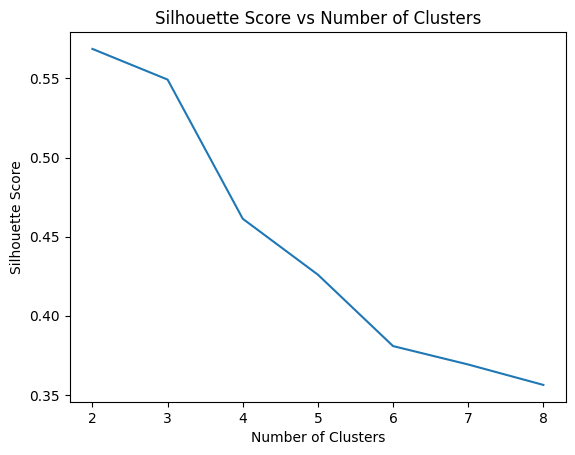

In [0]:
# Silhouette Scores K-Means

no_of_clusters = range(2, 9)
silhouette_scores = []

for n_cluster in no_of_clusters:
    kmeans = KMeans(n_clusters=n_cluster, random_state=1, init="k-means++").fit(monthly_spend)
    label = kmeans.labels_
    silhouette_coeff = silhouette_score(monthly_spend, label, metric="euclidean")
    silhouette_scores.append(silhouette_coeff)

plt.plot(no_of_clusters, silhouette_scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Number of Clusters')
plt.show()

/databricks/python/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:259: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f56660344c0>
Traceback (most recent call last):
  File "/databricks/python/lib/python3.10/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/databricks/python/lib/python3.10/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/databricks/python/lib/python3.10/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/databricks/python/lib/python3.10/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
A

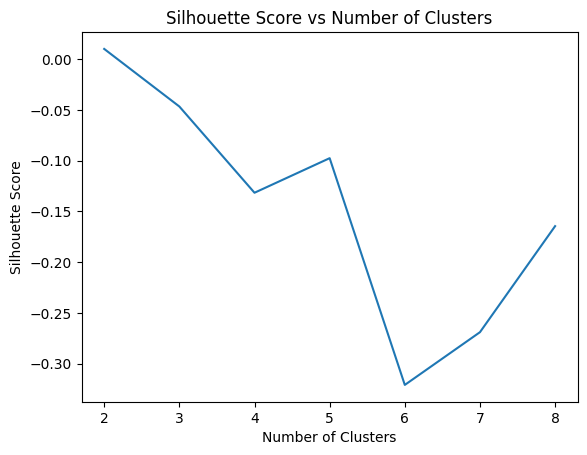

In [0]:
# Silhouette Scores Spectral Clustering

no_of_clusters = range(2, 9)
silhouette_scores = []

for n_cluster in no_of_clusters:
    spectral = SpectralClustering(n_clusters=n_cluster, random_state=1, assign_labels='kmeans').fit(monthly_spend)
    labels = spectral.labels_
    if len(np.unique(labels)) > 1:  # Check if there's more than one cluster
        silhouette_coeff = silhouette_score(monthly_spend, labels, metric="euclidean")
        silhouette_scores.append(silhouette_coeff)
    else:
        silhouette_scores.append(0)  # Assign 0 if only one cluster is found

plt.plot(no_of_clusters, silhouette_scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Number of Clusters')
plt.show()


In [0]:
# Error code
# # Silhouette Scores K-SpectralClustering

# no_of_clusters = range(2, 9)
# silhouette_scores = []

# for n_cluster in no_of_clusters:
#     spectral = SpectralClustering(n_clusters=n_cluster, random_state=1).fit(monthly_spend)
#     label = spectral.labels_
#     silhouette_coeff = silhouette_score(monthly_spend, label, metric="euclidean")
#     silhouette_scores.append(silhouette_coeff)

# plt.plot(no_of_clusters, silhouette_scores)
# plt.xlabel('Number of Clusters')
# plt.ylabel('Silhouette Score')
# plt.title('Silhouette Score vs Number of Clusters')
# plt.show()

/databricks/python/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:259: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f5670becb80>
Traceback (most recent call last):
  File "/databricks/python/lib/python3.10/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/databricks/python/lib/python3.10/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/databricks/python/lib/python3.10/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/databricks/python/lib/python3.10/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
A

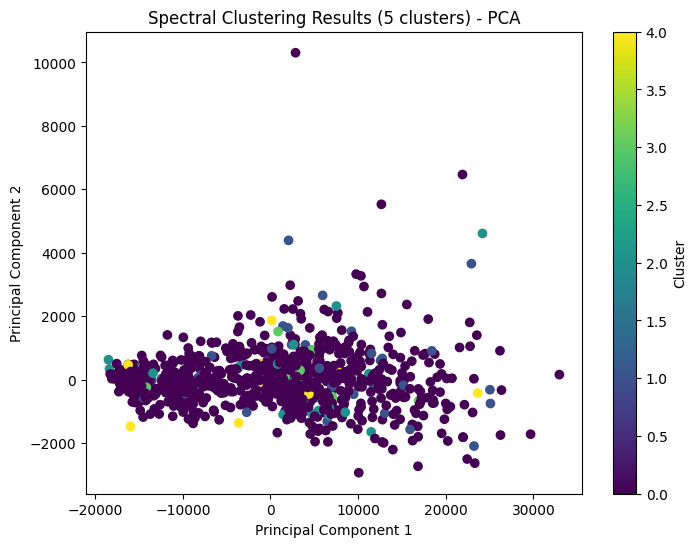

In [0]:

# Fit the spectral clustering model
spectral_cluster_5_clusters = SpectralClustering(n_clusters=5, random_state=1).fit(monthly_spend)

# Perform dimensionality reduction using PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(monthly_spend)

# Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=spectral_cluster_5_clusters.labels_, cmap='viridis')
plt.title('Spectral Clustering Results (5 clusters) - PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()



/databricks/python/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:259: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f56717423b0>
Traceback (most recent call last):
  File "/databricks/python/lib/python3.10/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/databricks/python/lib/python3.10/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/databricks/python/lib/python3.10/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/databricks/python/lib/python3.10/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
A

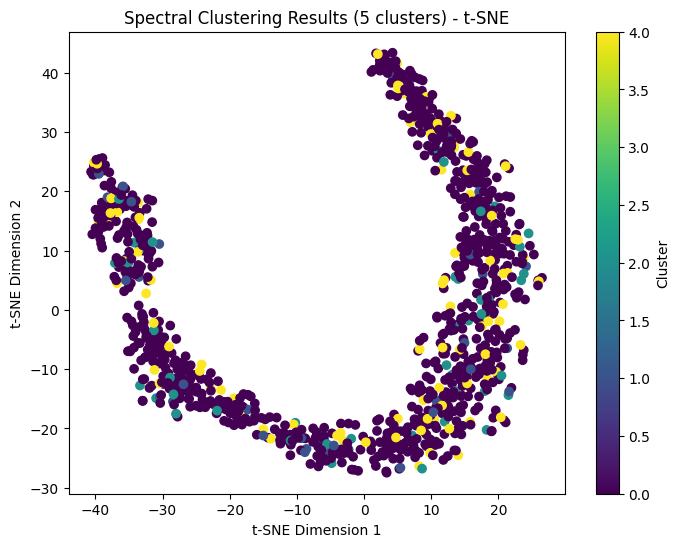

In [0]:
spectral_cluster_5_clusters = SpectralClustering(n_clusters=5, random_state=1).fit(monthly_spend)

# Perform dimensionality reduction using t-SNE
tsne = TSNE(n_components=2, random_state=1)
tsne_result = tsne.fit_transform(monthly_spend)

# Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=spectral_cluster_5_clusters.labels_, cmap='viridis')
plt.title('Spectral Clustering Results (5 clusters) - t-SNE')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.colorbar(label='Cluster')

plt.show()

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f5665aa55a0>
Traceback (most recent call last):
  File "/databricks/python/lib/python3.10/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/databricks/python/lib/python3.10/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/databricks/python/lib/python3.10/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/databricks/python/lib/python3.10/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_ca

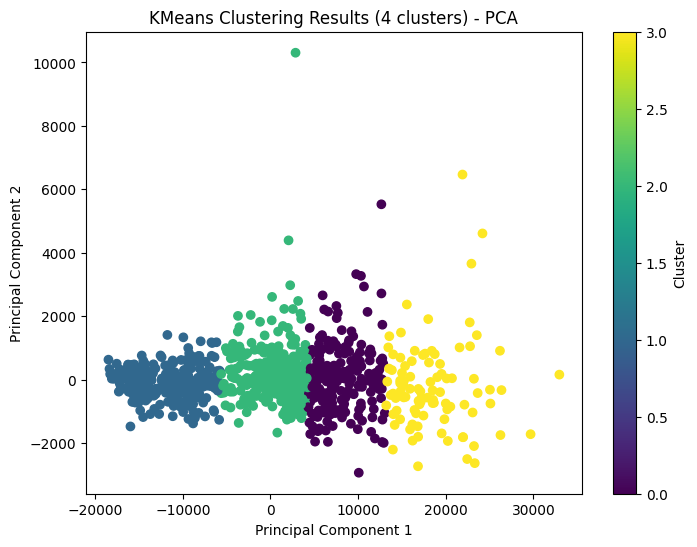

In [0]:
kmeans = KMeans(n_clusters=4, random_state=1).fit(monthly_spend)

# Perform dimensionality reduction using PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(monthly_spend)

# Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=kmeans.labels_, cmap='viridis')
plt.title('KMeans Clustering Results (4 clusters) - PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

In [0]:
%sql
-- Can we find in here what these 4 distinct clusters allude to?
SELECT
  *
FROM
  monthly_spenders

account_id month_id amount num_transactions 358846516 202304 -4039.19 25 405416860 202304 -1679.24 13 757115616 202304 -1639.85 6 679911053 202304 -2201.78 26 408057540 202304 -3256.15 23 480557476 202304 -1867.07 25 887156614 202304 -2438.97 14 600185455 202304 -77.18 7 160166876 202305 -646.92 6 999752672 202306 -4183.21 41 479366718 202306 -2596.45 15 990894155 202306 -2413.91 16 849096144 202306 -1519.63 40 494156462 202306 -458.44 10 698955014 202307 -4682.92 26 703478110 202307 -2049.11 17 454356905 202307 -1750.3 36 776108637 202306 -1678.63 33 842682241 202304 -3087.27 11 843537309 202305 -1206.92 8 581618317 202305 -1851.12 12 215404070 202305 -961.39 14 960208650 202305 -3921.41 16 849096144 202305 -1623.7 45 762700245 202305 -556.22 16 625658193 202305 -551.79 10 285428103 202306 -1563.19 21 108931112 202306 -3328.27 26 766692943 202306 -2000.44 7 675231808 202306 -1434.84 16 547010927 202306 -1411.58 46 899983008 202306 -179.24 5 992204045 202307 -3735.93 33 151968462 202307 -5706.7 51 128033695 202307 -1094.83 42 492215823 202307 -2712.49 37 655730067 202307 -268.49 8 490868147 202307 -1124.7 15 256002321 202304 -2121.02 32 914806976 202304 -2000.5 19 903468956 202304 -1000.31 10 575652395 202304 -924.4 20 344219145 202305 -2877.2 23 648644594 202305 -1666.35 13 819515373 202305 -2092.39 18 572384506 202305 -7159.0 30 518474507 202305 -1456.53 49 304455868 202305 -1528.56 7 851181128 202306 -2004.05 42 336557504 202306 -2311.24 18 245690309 202306 -1203.67 24 291580432 202306 -2333.63 11 874506295 202306 -636.58 7 235663459 202307 -4852.32 35 957821152 202307 -2017.62 12 429556122 202307 -1051.77 11 152616936 202307 -590.74 11 967989787 202307 -619.98 8 425730826 202307 -3662.91 34 593191200 202307 -501.65 7 715068825 202307 -347.6 7 445240363 202304 -348.6 15 819515373 202304 -2409.05 27 637433131 202304 -1652.55 12 475277431 202304 -3415.88 24 691843653 202304 -277.21 12 344843570 202304 -120.12 5 116169597 202304 -1034.91 13 519933553 202304 -1921.9 19 722358036 202304 -2049.04 16 403902116 202304 -2753.94 10 885259672 202305 -1579.45 41 783650950 202305 -608.82 11 838830098 202305 -1663.82 21 782058249 202305 -176.56 7 816685391 202306 -1756.56 12 895331556 202306 -2272.66 24 859603181 202306 -2602.53 18 737537711 202306 -209.16 8 578131296 202306 -1217.6 19 336557504 202307 -2233.13 25 950234174 202307 -2776.95 49 452974357 202307 -2895.9 10 872286364 202307 -1292.62 4 874431242 202307 -1840.23 44 480198977 202307 -1462.5 18 956717493 202307 -2447.87 20 971129830 202307 -892.78 9 786927378 202306 -157.96 5 920031185 202307 -1035.17 22 272538745 202304 -852.36 14 340321732 202304 -2828.63 13 252701364 202304 -319.07 14 897714622 202304 -2160.89 8 215426302 202305 -1658.08 25 945054126 202305 -1165.83 14 108931112 202305 -2580.82 18 387957305 202305 -335.25 6 635679314 202305 -239.14 4 242218612 202305 -341.68 8 344522228 202305 -190.31 11 978410962 202305 -164.46 8 822135975 202306 -2136.64 58 945054126 202306 -1813.15 20 520447032 202306 -1357.18 15 544961962 202306 -1820.46 13 720742759 202306 -1379.12 19 680773155 202307 -1514.1 20 730002588 202307 -2168.87 43 402438092 202307 -1567.13 23 419550103 202307 -1160.36 19 679911053 202307 -2427.71 31 147341222 202307 -662.9 12 857455726 202307 -870.93 7 612304466 202307 -402.17 8 430910686 202307 -1604.16 12 711045550 202304 -4105.22 23 854895960 202304 -1782.51 12 215426302 202304 -1669.31 15 656812046 202305 -2285.63 43 896821055 202305 -1317.52 10 223207876 202305 -1326.48 26 570410059 202305 -1416.96 22 254018059 202305 -240.52 8 257633312 202306 -1623.34 12 985188462 202306 -2615.18 52 613427466 202306 -1053.16 20 500843551 202307 -2975.9 23 994947671 202307 -1279.68 8 158766229 202307 -393.82 13 678330503 202305 -1928.12 29 741903302 202304 -2507.09 21 996042490 202304 -2512.22 14 780859359 202304 -138.96 4 835829467 202305 -692.35 9 802697323 202305 -962.9 26 660789920 202305 -191.52 7 333054026 202305 -756.51 13 656781737 202306 -959.97 4 287480331 20230

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f56648872e0>
Traceback (most recent call last):
  File "/databricks/python/lib/python3.10/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/databricks/python/lib/python3.10/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/databricks/python/lib/python3.10/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/databricks/python/lib/python3.10/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_ca

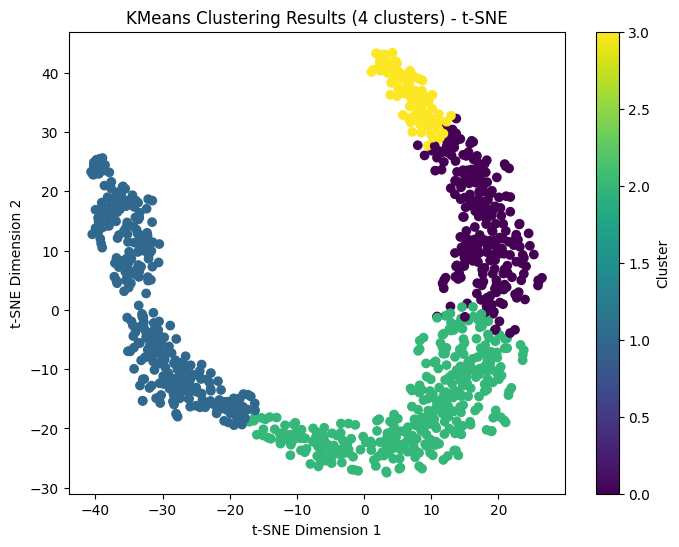

In [0]:
kmeans = KMeans(n_clusters=4, random_state=1).fit(monthly_spend)

# Perform dimensionality reduction using t-SNE
tsne = TSNE(n_components=2, random_state=1)
tsne_result = tsne.fit_transform(monthly_spend)

# Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=kmeans.labels_, cmap='viridis')
plt.title('KMeans Clustering Results (4 clusters) - t-SNE')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.colorbar(label='Cluster')
plt.show()

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f5670bece50>
Traceback (most recent call last):
  File "/databricks/python/lib/python3.10/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/databricks/python/lib/python3.10/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/databricks/python/lib/python3.10/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/databricks/python/lib/python3.10/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'


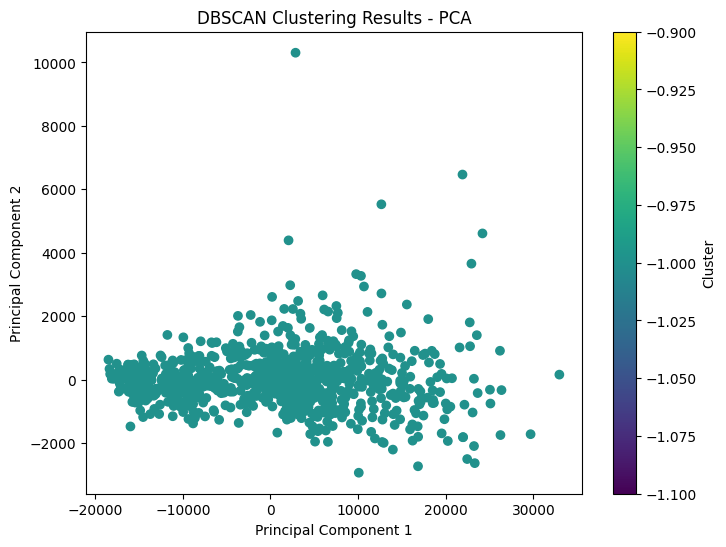

In [0]:
# Fit the DBSCAN clustering model
dbscan = DBSCAN(eps=0.5, min_samples=4).fit(monthly_spend)

# Perform dimensionality reduction using PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(monthly_spend)

# Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=dbscan.labels_, cmap='viridis')
plt.title('DBSCAN Clustering Results - PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f5664a21f30>
Traceback (most recent call last):
  File "/databricks/python/lib/python3.10/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/databricks/python/lib/python3.10/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/databricks/python/lib/python3.10/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/databricks/python/lib/python3.10/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
/databricks/python/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will chang

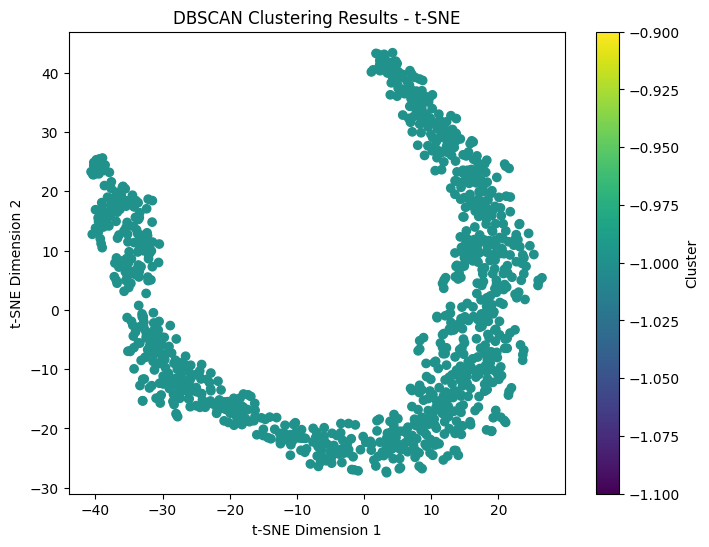

In [0]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN

# Fit the DBSCAN clustering model
dbscan = DBSCAN(eps=0.5, min_samples=3).fit(monthly_spend)

# Perform dimensionality reduction using t-SNE
tsne = TSNE(n_components=2, random_state=1)
tsne_result = tsne.fit_transform(monthly_spend)

# Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=dbscan.labels_, cmap='viridis')
plt.title('DBSCAN Clustering Results - t-SNE')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.colorbar(label='Cluster')
plt.show()


In [0]:
print(monthly_spend)

             amount                             ... num_transactions                   total
month_id     202301   202302   202303   202304  ...         20231001 202311 202312          
account_id                                      ...                                         
101531259   2241.03  1223.37  1146.01  1410.61  ...              0.0    7.0    4.0  17737.58
104832000   3780.83  2444.87  2152.51  2178.26  ...              1.0   10.0    2.0  25265.52
105375973    762.37  1106.70  1792.91   187.17  ...              0.0    8.0    1.0  10240.77
106601471    709.01  1326.08   481.76   541.99  ...              1.0   23.0    4.0   7957.00
108481285    766.36   820.41  1873.00  1107.04  ...              2.0   43.0    7.0  15410.08
...             ...      ...      ...      ...  ...              ...    ...    ...       ...
995615876   1577.87  1053.48  1424.22  1877.59  ...              0.0   14.0    4.0  17807.27
996042490   2752.49  3564.03  3658.47  2512.22  ...              0.0  

#OLD Work

## Feature Engineering

In [0]:
%sql
CREATE OR REPLACE VIEW eng_account AS
SELECT
  account_id,
  ROUND(AVG(amount), 2) AS average_spend,
  ROUND(SUM(amount), 2) AS monthly_spend,
  COUNT(*) AS total_transact
FROM
  simulated_transaction_2024_csv
WHERE 
  account_id IS NOT NULL
GROUP BY
  account_id


In [0]:
%sql
CREATE OR REPlACE TEMP VIEW fin_table AS
SELECT
  sim.account_id,
  balance,
  amount,
  -- CAST(external_account_desc AS STRING) AS external_account_desc, 
  -- REPLACE(external_account_desc, ' ', '_') AS external_account_desc,
  CASE LOWER(external_account_desc)
    WHEN 'Amazon' THEN 'amazon_sub'
    WHEN 'AMAZON' THEN 'amazon_purchase'
    ELSE REPLACE(REPLACE(LOWER(external_account_desc), "'", ''), ' ', '_') END AS external_account_desc,
  MODE() WITHIN GROUP (ORDER BY time_stamp) AS most_common_time,
  eng.average_spend,
  eng.monthly_spend,
  eng.total_transact
FROM
  simulated_transaction_2024_csv sim
LEFT JOIN
  eng_account eng
ON
  sim.account_id = eng.account_id
WHERE 
  sim.account_id IS NOT NULL 
  AND external_account_desc IS NOT NULL
  AND sim.time_stamp IS NOT NULL
GROUP BY 
  sim.account_id,
  external_account_desc,
  balance,
  amount,
  eng.average_spend,
  eng.monthly_spend,
  eng.total_transact

In [0]:
%sql
SELECT
  DISTINCT
  external_account_desc
FROM  
  fin_table

external_account_desc five_senses_art matalan halifax tesco barbiee_boutique university_college_hospital blackwells lbg selfridges revella a_yarn_story topshop cass_art pets_corner amazon stitch_by_stitch netflix fat_face lloyds_pharmacy lavender_fields pets_at_home cpa premier_finance vision_express millets head starbucks mojang_studios collector_cave etsy hmv sainsbury_local foyles coop_local craftastic sports_direct lavender_primary the_works happy_days_home hobby_lobby costa_coffee reebok specsavers squareonix jd_sports jollyes sainsbury rose_&_crown gamestation brilliant_brushes kew_house the_crown coffee_#1 hobbycraft sunny_care_nursery wool deliveroo loosely_fitted fitted_stitch disney green_park_academy boots xbox a_cut_above puregym town_high victoria_park westport_care_home green_park remedy_plus_care cex kings_arms north_face grand_union_bjj blizzard justeat mountain_warehouse mothercare mamas_&_papas frankie_&_bennies gap_kids rugbyfields

In [0]:
df = spark.table('fin_table').toPandas()

In [0]:
df['most_common_minutes'] = df['most_common_time'].apply(lambda x: int(x[:2]) * 60 + int(x[3:]))